# **Predicting Heart Disease using Machine Learning**
This project explores the use of various Python-based machine learning and data science libraries to build a predictive model capable of determining whether a person has heart disease based on their medical attributes.

The project follows a structured machine learning workflow to ensure clarity, reproducibility, and effective experimentation.
We're going to follow the following steps:
1. Problem Definition – Clearly defining the objective of the project

2. Data – Loading, exploring, and understanding the dataset

3. Evaluation – Deciding how model performance will be measured

4. Features – Understanding and preparing the input features

5. Modelling – Training and comparing different machine learning models

6. Experimentation – Improving results through tuning


## 1. Problem Definition
>Given clinical parameters about a patient , can we predict whether or not they have a heart disease or not.

## 2. Data
> The Original data came from the Cleaveland Data from UCI Machine Learning Repository.
[UCI Machine learning -Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

## 3. Evaluation
> We want to have a extremely high accuracy.So lets say we want to achieve atleast 95% accuracy.

## 4. Features

> 1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [74]:
# Importing the tools that we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [75]:
#load data
df = pd.read_csv('/content/drive/MyDrive/DATASETS/heart-disease.csv')
df.shape

(303, 14)

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
#check for missing values(if any)
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [78]:
#find out how may of each class is there
df.target.value_counts()

,count
target,
1,165
0,138


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

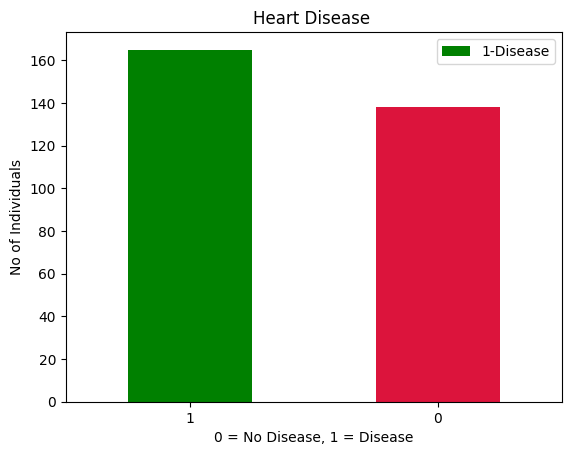

In [79]:
df['target'].value_counts().plot(kind='bar',color=['green','crimson'])
plt.title('Heart Disease ')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('No of Individuals')
plt.legend(['1-Disease','0-No disease'])
plt.xticks(rotation=0)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [82]:
#Now we will compare different columns in order to gain insight about the data and correlation

#compare target with sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

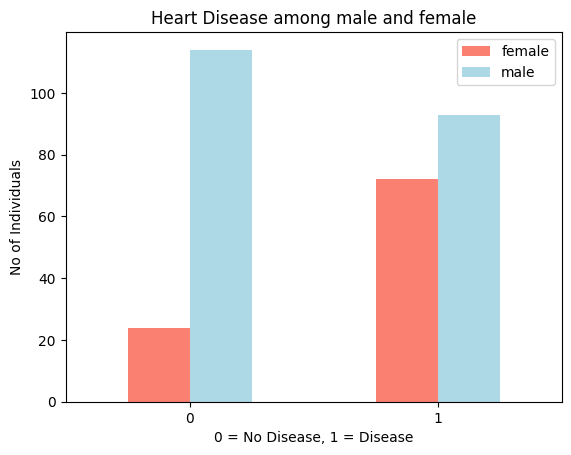

In [83]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   color=['salmon','lightblue'],
                                   )
plt.title('Heart Disease among male and female')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('No of Individuals')
plt.legend(['female','male'])
plt.xticks(rotation=0)

In [84]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

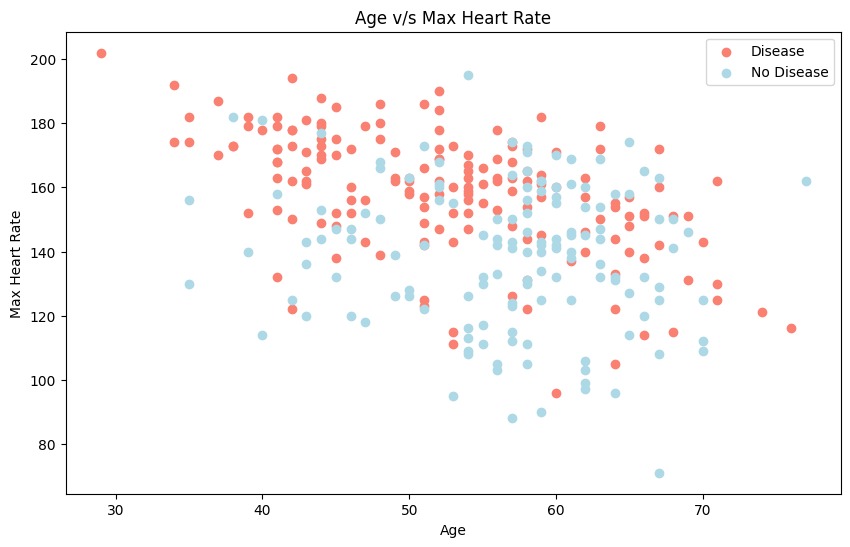

In [85]:
#Age vs Max heart rate
plt.figure(figsize=(10,6))


plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color='salmon');


plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color='lightblue');

plt.title('Age v/s Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

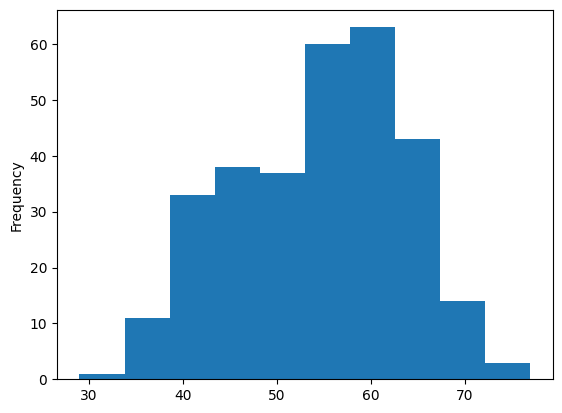

In [86]:
#distribution of age using a histogram
df.age.plot(kind='hist');

In [87]:
#heart disease frequency vs chestpain
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: ylabel='cp'>

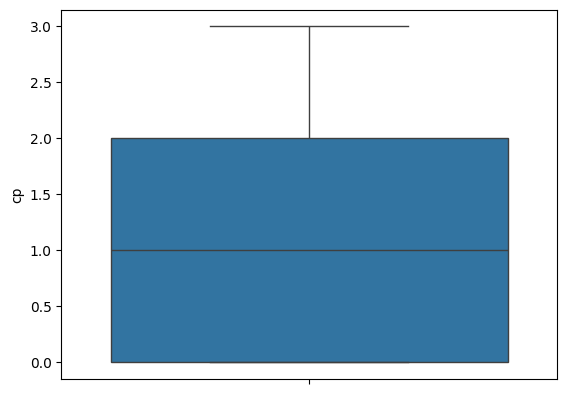

In [88]:
sns.boxplot(df.cp)
#to find outliers we can do boxplot

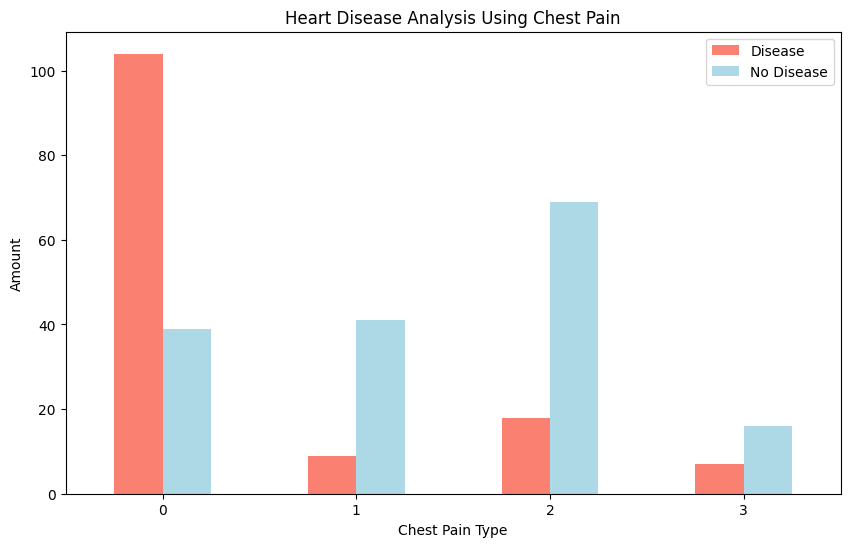

In [89]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])

plt.title('Heart Disease Analysis Using Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['Disease','No Disease'])
plt.xticks(rotation=0);

## Its very important to find the  correlation among the features in order to know which features are useful for predicting labels and which are not.

### There are certain ways to find correlation:
1. **USING PANDAS** :
    `dataframe.corr()`

2. **USING NUMPY** :

    `matrix = np.corrcoef(x,y)`

3. **USING SEABORN(recommended)**:

    `sns.heatmap(corr)`

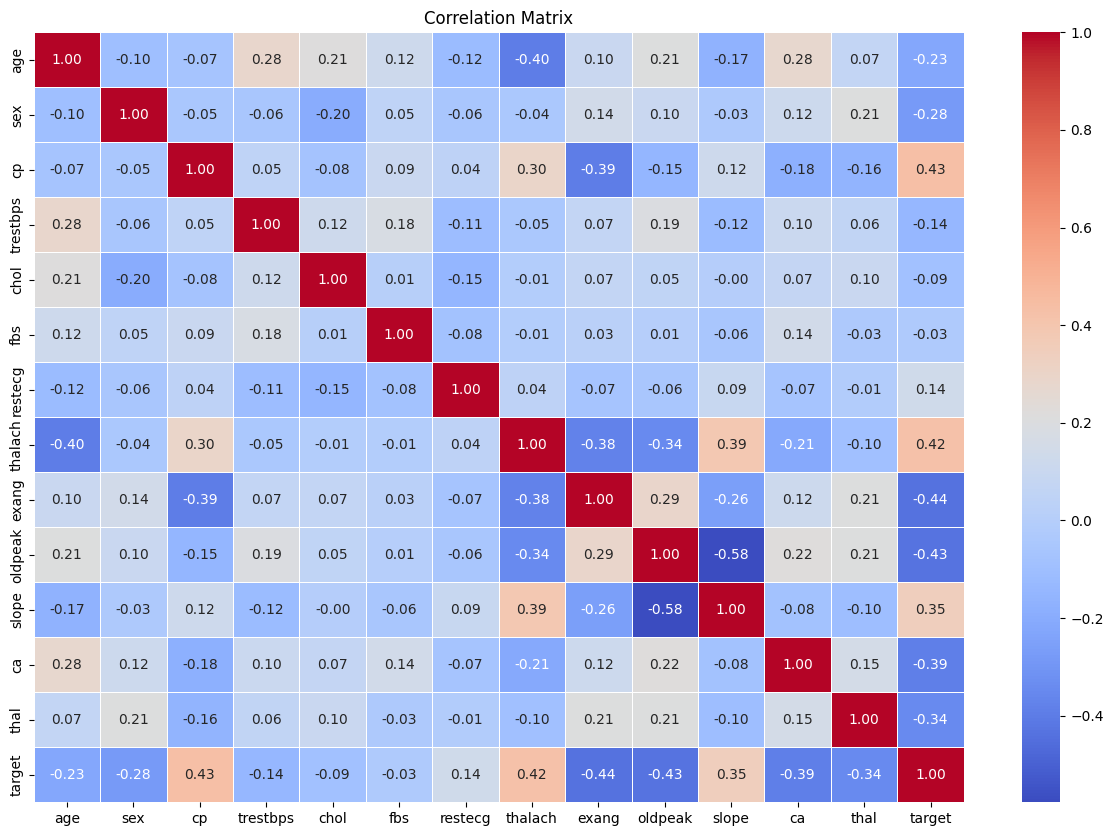

In [90]:
#create the matrix using pandas
corr_matrix = df.corr(numeric_only=True)

#visualising using sns
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt='.2f',
                 cmap='coolwarm',
                 linewidths=0.5)
ax.set(title='Correlation Matrix');

In [91]:
models = {
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression()
    }

In [165]:
#creating a pipeline to train and test three different models at once
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def run_model(models, X_train, X_test, y_train, y_test):
    results = {}

    # 1. Scale the data manually
    scaler = StandardScaler()

    # Fit on training data and transform both
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Loop through and train models
    for name, model in models.items():
        # Train the model on scaled data
        model.fit(X_train_scaled, y_train)

        # Predict on scaled test data
        y_pred = model.predict(X_test_scaled)

        # Score
        score = accuracy_score(y_test, y_pred)
        results[name] = score

        print(f"--- {name} ---")
        print(classification_report(y_test, y_pred))

    return results, models # Returning 'models' lets you access them later

In [166]:
np.random.seed(42)
X = df.drop('target',axis=1)
y = df.target

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

In [173]:
model_scores,base_models = run_model(models,X_train,X_test,y_train,y_test)

--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85       

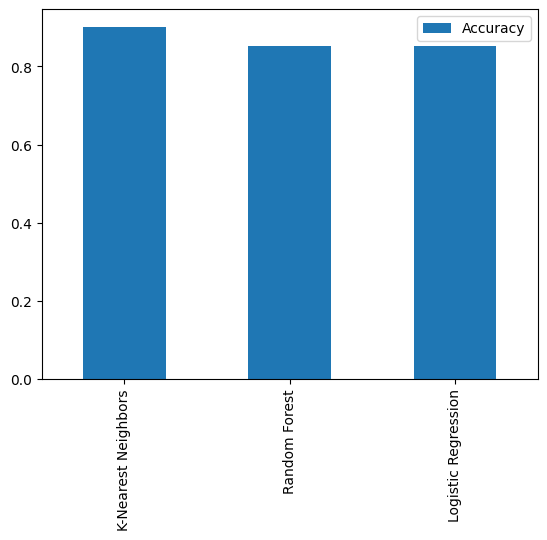

In [175]:
model_comparison = pd.DataFrame(model_scores, index = ['Accuracy'])
model_comparison.T.plot.bar();

### So our baseline model is ready ,noow is the time to tune this baby.

In [140]:
#Firstly we will tune using RandomizedSearchCV

#Create a hyperparamter grid for LogisticRegression
log_reg_grid = {
    'C':np.logspace(-4,4,20),
    'solver' : ['liblinear','sag','saga']
}

rfc_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split' : np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,20,2)
}

knn_grid ={
    'n_neighbors': np.arange(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

In [112]:
#Tune LogisticRegression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=True)

In [113]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(4.281332398719396)}

In [114]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

Tuning our Random forest classifier model

In [116]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rfc_grid,
                           cv=5,
                           n_iter=30,
                           verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [117]:
rs_rf.best_params_

{'n_estimators': np.int64(410),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(11),
 'max_depth': None}

In [119]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [120]:
model_scores

{'K-Nearest Neighbors': 0.9016393442622951,
 'Random Forest': 0.8360655737704918,
 'Logistic Regression': 0.8524590163934426}

In [141]:
knn_rs = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knn_grid,
    n_iter=20,
    cv=5,
    random_state=42,
    verbose=True,
    n_jobs=-1
)
knn_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=True)

In [142]:
knn_rs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=np.int64(23), p=1)

In [143]:
knn_rs.score(X_test,y_test)

0.7540983606557377

# Hyperparameter Tuning with GridSearchCV

In [144]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'sag', 'saga']},
             verbose=True)

In [145]:
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [146]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [152]:
rfc_grid = {
    'n_estimators': [5,10,100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gs_rfc = GridSearchCV(RandomForestClassifier(),
                          param_grid=rfc_grid,
                          cv=5,
                          verbose=True)

gs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 100]},
             verbose=True)

In [153]:
gs_rfc.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 10}

In [154]:
gs_rfc.score(X_test,y_test)

0.8852459016393442

In [156]:
knn_grid = {
        'n_neighbors': np.arange(1, 31, 2), # 1, 3, 5... 29
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
knn_gs = GridSearchCV(
    KNeighborsClassifier(),
    knn_grid,
    cv=5,
    n_jobs=-1,
    verbose=True
)

knn_gs.fit(X_train,y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [157]:
knn_gs.score(X_test,y_test)

0.7049180327868853

# **EVALUATION**


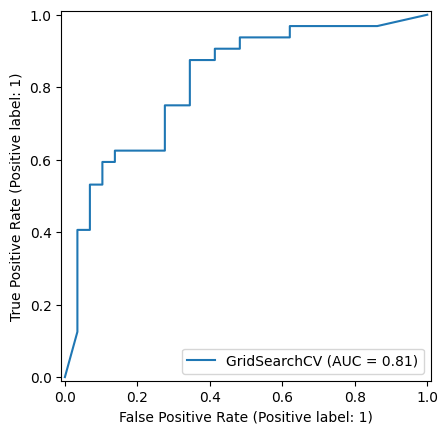

In [158]:
#plotting the ROC_AUC Curve
RocCurveDisplay.from_estimator(knn_gs,X_test,y_test)

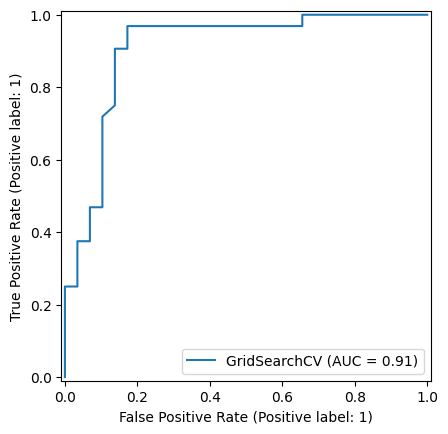

In [159]:
RocCurveDisplay.from_estimator(gs_rfc,X_test,y_test)

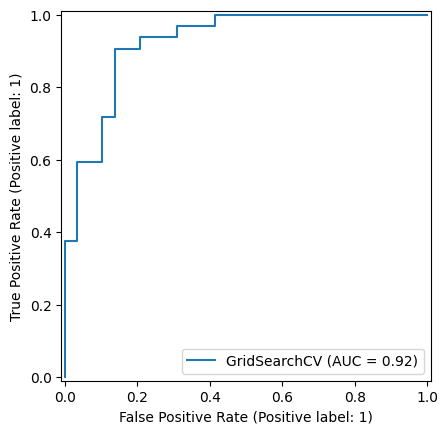

In [160]:
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [162]:
y_preds_log = gs_log_reg.predict(X_test)
y_preds_log

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

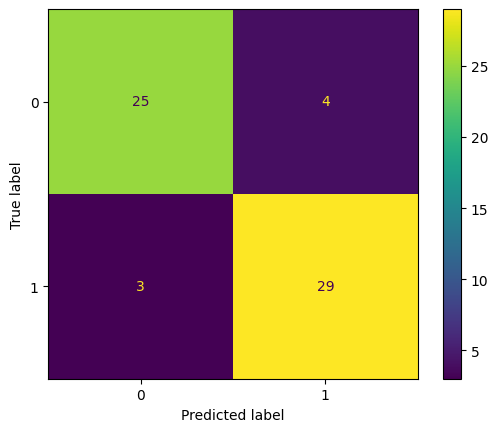

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds_log);

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


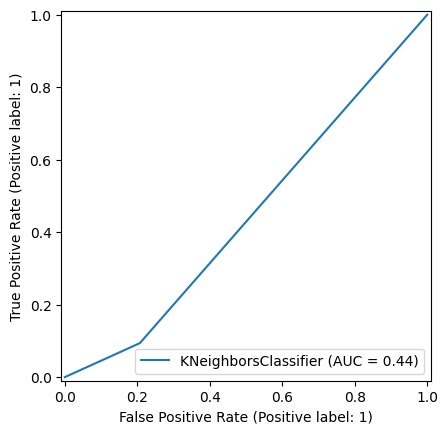

In [180]:
base_knn = base_models['K-Nearest Neighbors']
RocCurveDisplay.from_estimator(base_knn,X_test,y_test);
#this model has the acuuracy but has the lowest auc this means this model is no good


In [182]:
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [186]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

In [188]:
#cross validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring='accuracy'
)
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [189]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [193]:
#cross validated precision
cv_precision = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring='precision'
)
cv_precision = np.mean(cv_precision)
cv_precision


np.float64(0.8215873015873015)

In [196]:
#cross validated f1-score
cv_f1 = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring='f1'
)
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

In [195]:
#cross validated recall
cv_recall = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring='recall'
)
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

<Axes: title={'center': 'Cross-Validated Classification metrics'}>

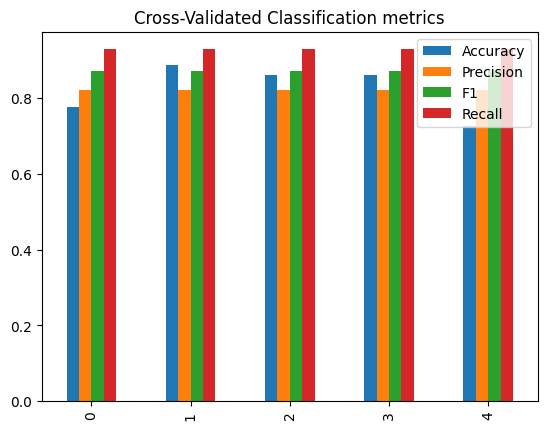

In [204]:
cv_metrics = pd.DataFrame({
    'Accuracy':cv_acc,
    'Precision':cv_precision,
    'F1':cv_f1,
    'Recall':cv_recall
})
cv_metrics.plot.bar(title='Cross-Validated Classification metrics')